In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

2024-05-18 12:52:39.871745: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 12:52:41.014962: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('DEATH_EVENT', axis=1), df['DEATH_EVENT'], random_state=42,
                                                    test_size=0.2)

In [23]:
#from keras import Input

model = Sequential()
#model.add(Input(shape=X_train.shape[1:]))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(X_train.values.reshape((-1, X_train.shape[1], 1)), y_train, validation_data=(X_test, y_test), batch_size=32,
          epochs=10, verbose=0)

In [9]:
model.fit(X_train.values.reshape((-1, X_train.shape[1], 1)), y_train, epochs=10, validation_data=(X_test, y_test),
          batch_size=32, )

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5840 - loss: 109.7261 - val_accuracy: 0.5833 - val_loss: 125.8820
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5330 - loss: 141.3083 - val_accuracy: 0.6000 - val_loss: 3.8124
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5509 - loss: 92.9357 - val_accuracy: 0.5833 - val_loss: 165.3926
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6587 - loss: 87.0615 - val_accuracy: 0.5833 - val_loss: 142.6838
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5529 - loss: 112.5751 - val_accuracy: 0.5667 - val_loss: 69.8572
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 141.0499 - val_accuracy: 0.5667 - val_loss: 69.3453
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6547 - loss: 49.4053 - val_accuracy: 0.5833 - val_loss: 388.4341
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6569 - loss: 174.3342 - val_accuracy: 0.5833 - va

In [10]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [11]:
#XGBoost
xgb_cf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_depth=3)
xgb_cf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Testing


In [24]:
cnn_score = model.evaluate(X_test.values.reshape((-1, X_test.shape[1], 1)), y_test, verbose=0)[1]
rf_score = rf.score(X_test, y_test)
xgb_score = xgb_cf.score(X_test, y_test)

In [25]:
print('CNN accuracy:', cnn_score)
print('Random Forest accuracy:', rf_score)
print('XGBoost accuracy:', xgb_score)

CNN accuracy: 0.5833333134651184
Random Forest accuracy: 0.6833333333333333
XGBoost accuracy: 0.7333333333333333


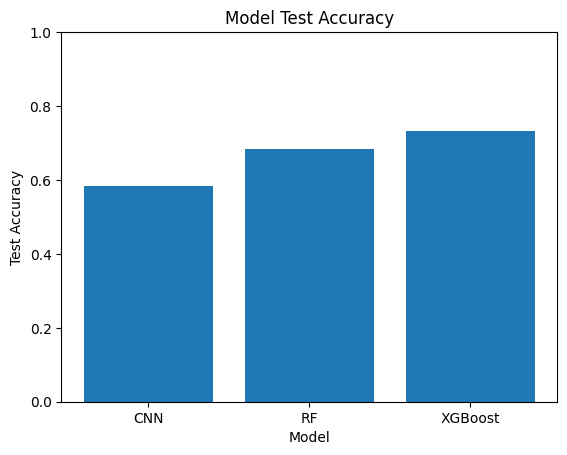

In [26]:
import matplotlib.pyplot as plt
models=['CNN', 'RF', 'XGBoost']
accuracy=[cnn_score, rf_score, xgb_score]
plt.bar(models, accuracy)
plt.title('Model Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim([0, 1])
plt.show()